In [98]:
import numpy as np
import pandas as pd

In [99]:
# Load the dataset
df = pd.read_csv("/content/model.csv", encoding="latin-1")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_Date               9800 non-null   object 
 1   Ship_Date                9800 non-null   object 
 2   Ship_Mode                9800 non-null   object 
 3   Segment                  9800 non-null   object 
 4   City                     9800 non-null   object 
 5   State                    9800 non-null   object 
 6   Region                   9800 non-null   object 
 7   Category                 9800 non-null   object 
 8   Sub_Category             9800 non-null   object 
 9   Product_Name             9800 non-null   object 
 10  Sales                    9800 non-null   float64
 11  Avg_Category_Sales       9800 non-null   float64
 12  Avg_SubCategory_Sales    9800 non-null   float64
 13  Avg_State_Sales          9800 non-null   float64
 14  Product_Avg_Sales       

In [ ]:
from sklearn.model_selection import train_test_split
# Define features and target variable (adjust 'target_column' accordingly)
X = df.drop(columns=['Sales'])
y = df['Sales']
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7840, 22), (1960, 22), (7840,), (1960,))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import r2_score,mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor

# # Define categorical features
# categorical_features = ['Order_Date','Ship_Date','Ship_Mode','Segment','City','State','Region','Category','Sub_Category','Product_Name']
# # Apply One-Hot Encoding with handle_unknown='ignore'
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
# ], remainder='passthrough')
# # Define RandomForestRegressor model
# step2 = RandomForestRegressor(n_estimators=100,
#                               random_state=3,
#                               max_samples=0.5,
#                               max_features=0.75,
#                               max_depth=25)
# # Create pipeline
# pipe = Pipeline([
#     ('step1', step1),
#     ('step2', step2)
# ])
# # Train the model
# pipe.fit(X_train, y_train)
# # Predictions
# y_pred = pipe.predict(X_test)
# # Model evaluation
# print('R2 score:', r2_score(y_test, y_pred))
# print('MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score: 0.8323037506076171
MAE: 22.249370553877608


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Save the dataset without Log_Sales column
df.to_csv("Model_updt.csv", index=False)

# Provide the download link
from google.colab import files
files.download("Model_updt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

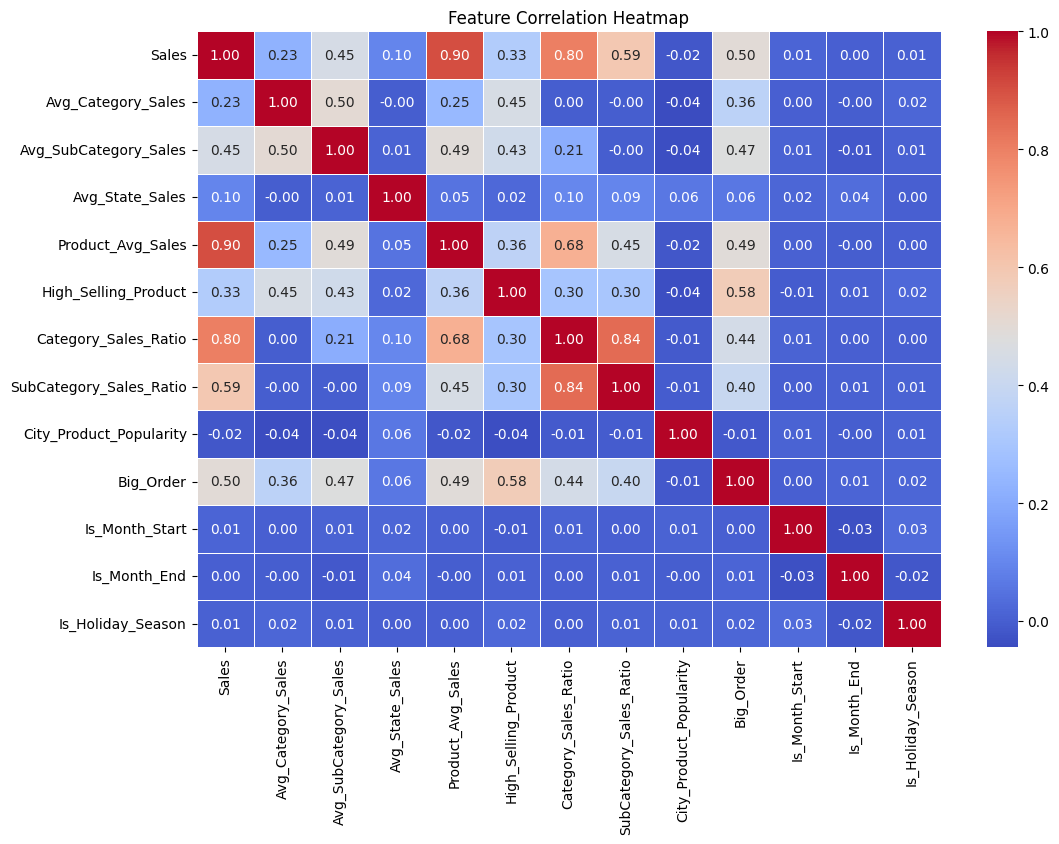

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Drop irrelevant columns
columns_to_remove = ["Is_Month_Start", "Is_Month_End", "Is_Holiday_Season",
                     "City_Product_Popularity", "Avg_State_Sales", "Avg_Category_Sales"]

df.drop(columns=columns_to_remove, errors="ignore",inplace = True)



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Select only numerical features
numerical_features = df.select_dtypes(include=[np.number]).dropna()

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

# Sort by highest VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data


,Feature,VIF
0,Sales,10.134086
4,Category_Sales_Ratio,7.705747
2,Product_Avg_Sales,7.204801
5,SubCategory_Sales_Ratio,5.119476
3,High_Selling_Product,2.860394
1,Avg_SubCategory_Sales,2.659987
6,Big_Order,2.538382


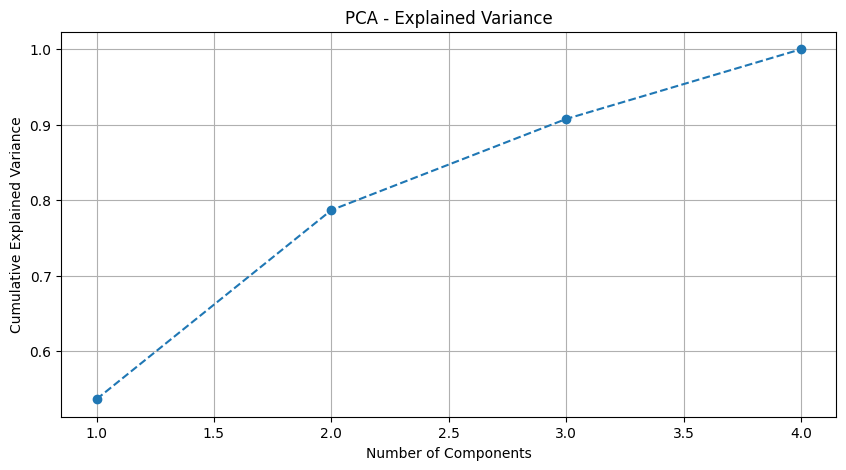

,Component,Explained Variance Ratio
0,1,0.536374
1,2,0.786870
2,3,0.907617
3,4,1.000000


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop highly correlated features before PCA
filtered_features = numerical_features.drop(columns=["Sales", "Category_Sales_Ratio", "Product_Avg_Sales"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_features)

# Apply PCA
pca = PCA(n_components=len(filtered_features.columns))
pca_result = pca.fit(scaled_data)

# Explained variance ratio plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(filtered_features.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()

# Show explained variance per component
explained_variance = pd.DataFrame({
    "Component": range(1, len(filtered_features.columns) + 1),
    "Explained Variance Ratio": np.cumsum(pca.explained_variance_ratio_)
})
explained_variance.head(10)  # Show first 10 components


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
# Define categorical features
categorical_features = ['Order_Date','Ship_Date','Ship_Mode','Segment','City','State','Region','Category','Sub_Category','Product_Name']
# One-Hot Encoding
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')
# Define your models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=43, max_samples=0.5, max_features=0.75, max_depth=25),
    'KNN': KNeighborsRegressor(n_neighbors=3),
    'SVR': SVR(kernel='rbf', C=10000, epsilon=0.1),
    'XGBoost': XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5),
    'VotingRegressor': VotingRegressor([
        ('rf', RandomForestRegressor(n_estimators=350, random_state=53, max_samples=0.5, max_features=0.75, max_depth=15)),
        ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
    ], weights=[1, 5])
}
# Store performance
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('step1', step1),
        ('step2', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae})
# Create performance DataFrame
performance_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(performance_df)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:2

             Model  R2 Score         MAE
4  VotingRegressor  0.853126   27.249280
3          XGBoost  0.851316   27.997882
0     RandomForest  0.819714   23.204864
1              KNN  0.761446  118.627741
2              SVR  0.540852   91.767737


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# Reduce data to first 7 principal components
num_components = 7
pca_transformed_data = pca.transform(scaled_data)[:, :num_components]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_transformed_data, numerical_features["Sales"], test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='linear'),
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({"Model": name, "R2 Score": r2, "MAE": mae})

# Add Voting Regressor (ensemble model)
voting_regressor = VotingRegressor(estimators=[("RF", models["RandomForest"]), ("XGB", models["XGBoost"])])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)
r2_voting = r2_score(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
results.append({"Model": "VotingRegressor", "R2 Score": r2_voting, "MAE": mae_voting})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df


,Model,R2 Score,MAE
0,RandomForest,0.922429,14.933693
2,KNN,0.879295,20.354922
4,VotingRegressor,0.849810,20.805689
1,XGBoost,0.743011,29.951526
3,SVR,0.357774,129.866329


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_Date               9800 non-null   object 
 1   Ship_Date                9800 non-null   object 
 2   Ship_Mode                9800 non-null   object 
 3   Segment                  9800 non-null   object 
 4   City                     9800 non-null   object 
 5   State                    9800 non-null   object 
 6   Region                   9800 non-null   object 
 7   Category                 9800 non-null   object 
 8   Sub_Category             9800 non-null   object 
 9   Product_Name             9800 non-null   object 
 10  Sales                    9800 non-null   float64
 11  Avg_SubCategory_Sales    9800 non-null   float64
 12  Product_Avg_Sales        9800 non-null   float64
 13  High_Selling_Product     9800 non-null   int64  
 14  Category_Sales_Ratio    

In [ ]:
# import pickle
# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))


In [ ]:
import joblib

# Save PCA pipeline
joblib.dump(pca, "pca.pkl")

# Save the best performing model (Voting Regressor in this case)
joblib.dump(voting_regressor, "sales_prediction_model.pkl")

print("PCA and trained model saved successfully.")

PCA and trained model saved successfully.


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_Date               9800 non-null   object 
 1   Ship_Date                9800 non-null   object 
 2   Ship_Mode                9800 non-null   object 
 3   Segment                  9800 non-null   object 
 4   City                     9800 non-null   object 
 5   State                    9800 non-null   object 
 6   Region                   9800 non-null   object 
 7   Category                 9800 non-null   object 
 8   Sub_Category             9800 non-null   object 
 9   Product_Name             9800 non-null   object 
 10  Sales                    9800 non-null   float64
 11  Avg_SubCategory_Sales    9800 non-null   float64
 12  Product_Avg_Sales        9800 non-null   float64
 13  High_Selling_Product     9800 non-null   int64  
 14  Category_Sales_Ratio    